In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract as pyt
from pytesseract import Output

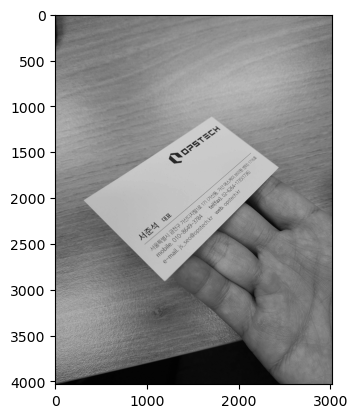

In [2]:
# 명함 이미지 불러오기
img = cv.imread('card.jpg', 0)

# 이미지 출력
plt.imshow(img, cmap='gray')

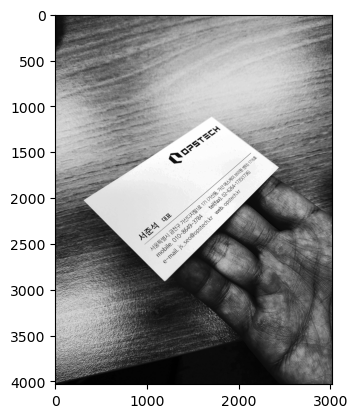

In [3]:
# 이미지 히스토그램 평탄화
equ = cv.equalizeHist(img)

# 이미지 출력
plt.imshow(equ, cmap='gray')

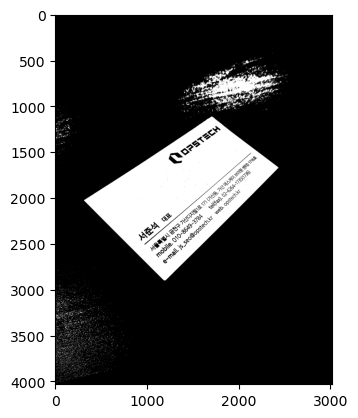

In [4]:
# 이미지 thresholding
_, img_thresh = cv.threshold(equ, 215, 255, cv.THRESH_BINARY)

# 이미지 출력
plt.imshow(img_thresh, cmap='gray')

In [5]:
# 이미지 리사이즈 3:4 비율로
img_resized = cv.resize(img_thresh, (990, 1320))

In [6]:
# 좌표 저장할 리스트
coords = []

# 마우스 클릭 이벤트 콜백 함수
def mouse_callback(event, x, y, flags, param):
    # 마우스 왼쪽 버튼을 클릭할 때
    if event == cv.EVENT_LBUTTONDOWN:
        print(f"마우스 좌클릭: ({x}, {y})")
        coords.append((x, y))
        
        # 좌표가 4개가 되면
        if len(coords) == 4:
            # 종료
            cv.destroyAllWindows()

# 윈도우 생성 및 이미지 표시
cv.namedWindow("image")
cv.imshow("image", img_resized)

# 마우스 이벤트 콜백 함수 등록
cv.setMouseCallback("image", mouse_callback)

# 키 입력 대기
cv.waitKey(0)

# 윈도우 종료
cv.destroyAllWindows()

마우스 좌클릭: (102, 665)
마우스 좌클릭: (559, 366)
마우스 좌클릭: (390, 951)
마우스 좌클릭: (797, 548)


In [7]:
print(coords)

[(102, 665), (559, 366), (390, 951), (797, 548)]


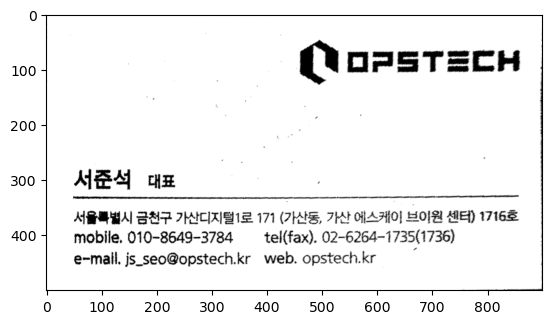

In [8]:
# 이미지 투시 변환
pts1 = np.float32([coords[0], coords[1], coords[2], coords[3]])

# 해당 좌표로 투시변환 가로 세로 90:50 비율로
pts2 = np.float32([[0, 0], [900, 0], [0, 500], [900, 500]])

m = cv.getPerspectiveTransform(pts1, pts2)
dst = cv.warpPerspective(img_resized, m, (900, 500))

plt.imshow(dst, cmap='gray')

In [9]:
# pytesseract로 텍스트 추출
custom_config = r'--oem 3 --psm 6'
text = pyt.image_to_string(dst, config=custom_config, lang='kor+eng')
print(text)

            6\ㅁㅁ5ㅜ크다
서준석 대표                          :
서올록별시 금천구 가산디지털1로 171 (가산동, 가산 에스케이 브이원 센터) 1716호
mobile, 010-8649-3784      tel(fax). 02-6264-1735(1736)                -
e-mail. js seo@opstech.kr web. opstech.kr       ：                       |

